In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# 1. load data
data = pd.read_csv("../NY_sample.csv")
data = data[(data['payment_type'] == 1) & (data['fare_amount'] > 0)
                      & (data['tip_amount'] > 0) & (data['trip_distance'] < 30)
                      & (data['tip_amount'] < 30)]
data = data.loc[:, ['tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'tip_amount']]
data = data.dropna()
data["tpep_dropoff_datetime"] = pd.to_datetime(data["tpep_dropoff_datetime"])

C:\Users\27143\AppData\Local\Temp\ipykernel_8360\2253098652.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../NY_sample.csv")


In [3]:
# 2. 特征工程
data["dropoff_month"] = data["tpep_dropoff_datetime"].dt.month
data["dropoff_hour"] = data["tpep_dropoff_datetime"].dt.hour
data["dropoff_weekday"] = data["tpep_dropoff_datetime"].dt.weekday

data = pd.get_dummies(data, columns=["dropoff_month", "dropoff_hour", "dropoff_weekday"])

In [4]:
# 3. transform date
X = data.drop(columns=["tip_amount", "tpep_dropoff_datetime"])
y = data["tip_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 4. split data
# Create a random forest model instance
rf_model = RandomForestRegressor()

# Define the hyperparameters you want to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

In [6]:
grid_search.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)
# Get the best model
best_model = grid_search.best_estimator_

In [8]:
# 6. Make predictions using the best model
y_pred = best_model.predict(X_test)
# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error:  2.730669722998036
R-squared: 0.4140918614534935


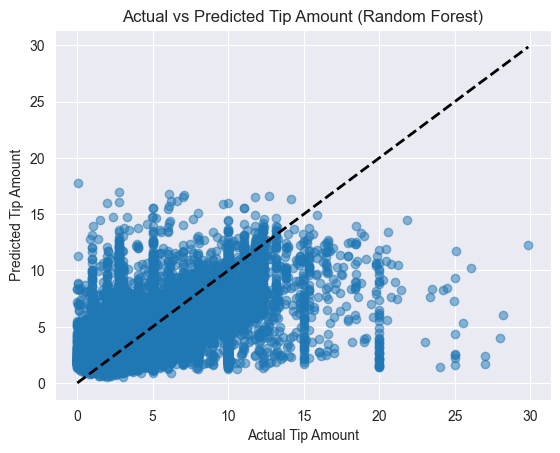

In [9]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # add a y=x line
plt.xlabel('Actual Tip Amount')
plt.ylabel('Predicted Tip Amount')
plt.title('Actual vs Predicted Tip Amount (Random Forest)')
plt.show()

In [10]:
# try a sample
input_data = pd.DataFrame({
    'passenger_count': [2],
    'trip_distance': [20.94],
    'tpep_dropoff_datetime': ['05/07/2023 15:44']
})

# prepossess the input data
input_data["tpep_dropoff_datetime"] = pd.to_datetime(input_data["tpep_dropoff_datetime"])

input_data["dropoff_month"] = input_data["tpep_dropoff_datetime"].dt.month
input_data["dropoff_hour"] = input_data["tpep_dropoff_datetime"].dt.hour
input_data["dropoff_weekday"] = input_data["tpep_dropoff_datetime"].dt.weekday

input_data = pd.get_dummies(input_data, columns=["dropoff_month", "dropoff_hour", "dropoff_weekday"])

# check the data
missing_cols = set(X_train.columns) - set(input_data.columns)
for c in missing_cols:
    input_data[c] = 0
input_data = input_data[X_train.columns]

# predict
predicted_tip_amount = best_model.predict(input_data)

print("tips:", predicted_tip_amount)

NameError: name 'model' is not defined